# Team project Big data and quantitative methods
## Rui YU

#### Q1. Work with the sharing bike dataset: Sharing_Bike.db
##### In order to encourage people to use shared bicycles and design a reasonable tariff, we shall analyze the data from different perspectives.
##### The data of sharing bike contains three tables: bike, Calendar, and weather.

##### A. Considering the holidays, write a SQL code to calculate the total count of casual users and the total count of registered users in each holiday of 2012.

In [1]:
import sqlite3
import pandas as pd
import statsmodels.api as sm

In [2]:
# Open the database from Python, i use sqlite3 to get the connection with the database Sharing_bike
conn = sqlite3.connect('data/Sharing_Bike.db')

In [3]:
# Use the pd.read_sql_query to use SQL code in python to get the table
df_total_users = pd.read_sql_query(
    '''SELECT bike.dteday as holiday, sum(casual) as Total_casual_users,
       sum(registered) as Total_registered_users
       FROM bike
       JOIN Calendar C
       ON bike.dteday = C.dteday
       WHERE C.holiday = 1
       group by bike.dteday;''', conn)

In [4]:
print(df_total_users)

       holiday  Total_casual_users  Total_registered_users
0   2012-01-02                 244                    1707
1   2012-01-16                 217                    2081
2   2012-02-20                 502                    2627
3   2012-04-16                1198                    5172
4   2012-05-28                2557                    3486
5   2012-07-04                2562                    4841
6   2012-09-03                1965                    4069
7   2012-10-08                 874                    4604
8   2012-11-12                1097                    5172
9   2012-11-22                 955                    1470
10  2012-12-25                 440                     573


##### B.Considering 24 hours in a day, write a SQL code to calculate the average count of casual users and the average count of registered users for each hour.

In [5]:
df_average_users_hour = pd.read_sql_query(
    '''SELECT hr, sum(casual)/count(casual) as average_casual_hour,
       sum(registered)/count(registered) as average_registered_hour
       from bike
       group by hr;''', conn)

In [6]:
print(df_average_users_hour)

    hr  average_casual_hour  average_registered_hour
0    0                   10                       53
1    1                    7                       32
2    2                    5                       21
3    3                    2                       10
4    4                    1                        6
5    5                    1                       23
6    6                    4                       89
7    7                   11                      255
8    8                   24                      430
9    9                   37                      237
10  10                   56                      159
11  11                   73                      186
12  12                   84                      232
13  13                   89                      227
14  14                   93                      205
15  15                   92                      221
16  16                   90                      298
17  17                   89                   

###### I group by the dteday and calculate the total number of users per day then divided it by 24 to get the average of users per hour.

##### C. Output the top 20 dates of the highest total counts of casual users in 2012 with a SQL code.

In [7]:
df_top20_casual_users = pd.read_sql_query(
    '''SELECT bike.dteday, sum(casual) as total_casual_users
       from bike
       group by bike.dteday
       order by total_casual_users desc
       limit 20;''', conn)

In [8]:
print(df_top20_casual_users)

        dteday  total_casual_users
0   2012-05-19                3410
1   2012-05-27                3283
2   2012-04-07                3252
3   2012-09-15                3160
4   2012-03-17                3155
5   2012-10-06                3031
6   2012-06-16                2963
7   2012-05-26                2855
8   2012-04-15                2846
9   2012-08-18                2827
10  2012-10-20                2806
11  2012-06-02                2795
12  2012-04-14                2795
13  2012-06-09                2708
14  2012-05-20                2704
15  2012-06-23                2657
16  2012-10-27                2643
17  2012-06-17                2634
18  2012-05-12                2622
19  2012-09-02                2613


### Q2. Work with the real estate dataset, realestate.xlsx or realestate.csv
##### For question A and B, please hand in all source codes and the result.

##### A.You are asked to predict Sale Price, what are your reasonable choices from the dataset? Please report the total amounts of reasonable choices in the report, write a python code to express all your reasonable choices in regression formula.
Note: reasonable choices refer to considering all possible combinations of independent variables.

In [9]:
import statsmodels.formula.api as smf
from itertools import combinations

In [10]:
# Open the excel file to get know the general information of this file
df_realstate = pd.read_excel('data/Realstate.xlsx')
df_realstate.head(15)

,SalePrice,Size,Beds,Baths,Num_Garage,Year,Highway,Aircondition,SwimmingPool
0,360.0,3.032,4,4,2,1972,no,yes,no
1,340.0,2.058,4,2,2,1976,no,yes,no
2,250.0,1.780,4,3,2,1980,no,yes,no
3,205.5,1.638,4,2,2,1963,no,yes,no
4,275.5,2.196,4,3,2,1968,no,yes,no
5,248.0,1.966,4,3,5,1972,no,yes,yes
6,229.9,2.216,3,2,2,1972,no,yes,no
7,150.0,1.597,2,1,1,1955,no,yes,no
8,195.0,1.622,3,2,2,1975,no,yes,no
9,160.0,1.976,3,3,1,1918,no,no,no


<AxesSubplot:>

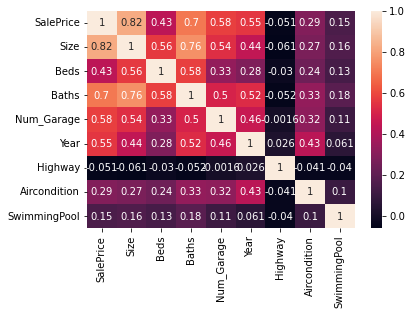

In [33]:
# correlation matrix with sns.heatmap
import seaborn as sns
corr_matrix = df_realstate.corr()
sns.heatmap(corr_matrix, annot=True)

In [11]:
df_realstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     521 non-null    float64
 1   Size          521 non-null    float64
 2   Beds          521 non-null    int64  
 3   Baths         521 non-null    int64  
 4   Num_Garage    521 non-null    int64  
 5   Year          521 non-null    int64  
 6   Highway       521 non-null    object 
 7   Aircondition  521 non-null    object 
 8   SwimmingPool  521 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 36.8+ KB


In [12]:
# I consider SalePrice is dependant variable, there are 8 different features,
# I try to find different combination possible in this dataset between these 8 independant variable to get the best combinations to get the best possible linear regression to predict the SalePrice of states.
feature = ['Size', 'Beds', 'Baths', 'Num_Garage', 'Year', 'Highway', 'Aircondition', 'SwimmingPool']
all_combinations = []
for f in range(1, len(feature)+1):
    oc = combinations(feature, f)
    for c in oc:
        all_combinations.append(list(c))
print(all_combinations)

[['Size'], ['Beds'], ['Baths'], ['Num_Garage'], ['Year'], ['Highway'], ['Aircondition'], ['SwimmingPool'], ['Size', 'Beds'], ['Size', 'Baths'], ['Size', 'Num_Garage'], ['Size', 'Year'], ['Size', 'Highway'], ['Size', 'Aircondition'], ['Size', 'SwimmingPool'], ['Beds', 'Baths'], ['Beds', 'Num_Garage'], ['Beds', 'Year'], ['Beds', 'Highway'], ['Beds', 'Aircondition'], ['Beds', 'SwimmingPool'], ['Baths', 'Num_Garage'], ['Baths', 'Year'], ['Baths', 'Highway'], ['Baths', 'Aircondition'], ['Baths', 'SwimmingPool'], ['Num_Garage', 'Year'], ['Num_Garage', 'Highway'], ['Num_Garage', 'Aircondition'], ['Num_Garage', 'SwimmingPool'], ['Year', 'Highway'], ['Year', 'Aircondition'], ['Year', 'SwimmingPool'], ['Highway', 'Aircondition'], ['Highway', 'SwimmingPool'], ['Aircondition', 'SwimmingPool'], ['Size', 'Beds', 'Baths'], ['Size', 'Beds', 'Num_Garage'], ['Size', 'Beds', 'Year'], ['Size', 'Beds', 'Highway'], ['Size', 'Beds', 'Aircondition'], ['Size', 'Beds', 'SwimmingPool'], ['Size', 'Baths', 'Num_Ga

In [13]:
num_combinations = len(all_combinations)
print('The total reasonable choise is: ',num_combinations)

The total reasonable choise is:  255


In [14]:
df_realstate['Highway'].replace(('yes', 'no'), (1,0), inplace=True)
df_realstate.head()

,SalePrice,Size,Beds,Baths,Num_Garage,Year,Highway,Aircondition,SwimmingPool
0,360.0,3.032,4,4,2,1972,0,yes,no
1,340.0,2.058,4,2,2,1976,0,yes,no
2,250.0,1.780,4,3,2,1980,0,yes,no
3,205.5,1.638,4,2,2,1963,0,yes,no
4,275.5,2.196,4,3,2,1968,0,yes,no


In [15]:
df_realstate['Aircondition'].replace(('yes', 'no'), (1,0), inplace=True)
df_realstate.head()

,SalePrice,Size,Beds,Baths,Num_Garage,Year,Highway,Aircondition,SwimmingPool
0,360.0,3.032,4,4,2,1972,0,1,no
1,340.0,2.058,4,2,2,1976,0,1,no
2,250.0,1.780,4,3,2,1980,0,1,no
3,205.5,1.638,4,2,2,1963,0,1,no
4,275.5,2.196,4,3,2,1968,0,1,no


In [16]:
df_realstate['SwimmingPool'].replace(('yes', 'no'), (1,0), inplace=True)
df_realstate.head()

,SalePrice,Size,Beds,Baths,Num_Garage,Year,Highway,Aircondition,SwimmingPool
0,360.0,3.032,4,4,2,1972,0,1,0
1,340.0,2.058,4,2,2,1976,0,1,0
2,250.0,1.780,4,3,2,1980,0,1,0
3,205.5,1.638,4,2,2,1963,0,1,0
4,275.5,2.196,4,3,2,1968,0,1,0


In [17]:


#For one combination only 'Highway' is possible
#for v in all_combinations:if len(v)== 1:for y in v:
for i in all_combinations:
    if len(i)==1:
       for v in i:
           y = df_realstate['SalePrice']
           x = df_realstate[v]
           x = sm.add_constant(x)
           model_v = sm.OLS(y,x).fit()
       print('The R-squared of ', v, 'is',model_v.rsquared)

The R-squared of  Size is 0.676943525214198
The R-squared of  Beds is 0.18622651426508718
The R-squared of  Baths is 0.4882290391240367
The R-squared of  Num_Garage is 0.3316060447689979
The R-squared of  Year is 0.30622680375934574
The R-squared of  Highway is 0.0025621650160889686
The R-squared of  Aircondition is 0.08294178192311974
The R-squared of  SwimmingPool is 0.021917262397679882


/Users/jeancloarec/opt/miniconda3/envs/PythonJ/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
for j in all_combinations:
    #if 4 >= len(j) > 1:
    if len(j) >1:
        x = df_realstate[j]
        y = df_realstate['SalePrice']
        x = sm.add_constant(x)
        model_j = sm.OLS(y,x).fit()
        print('The R-squared of ', j, 'is',model_j.rsquared)

The R-squared of  ['Size', 'Beds'] is 0.6784137426780028
The R-squared of  ['Size', 'Baths'] is 0.6899683825055396
The R-squared of  ['Size', 'Num_Garage'] is 0.7026632217585113
The R-squared of  ['Size', 'Year'] is 0.721477711424924
The R-squared of  ['Size', 'Highway'] is 0.6769440057049589
The R-squared of  ['Size', 'Aircondition'] is 0.6818316812342109
The R-squared of  ['Size', 'SwimmingPool'] is 0.6771593595197984
The R-squared of  ['Beds', 'Baths'] is 0.4894335974067221
The R-squared of  ['Beds', 'Num_Garage'] is 0.3970051003765632
The R-squared of  ['Beds', 'Year'] is 0.3887357150075673
The R-squared of  ['Beds', 'Highway'] is 0.18764532620894303
The R-squared of  ['Beds', 'Aircondition'] is 0.22226135539520864
The R-squared of  ['Beds', 'SwimmingPool'] is 0.19449291420015058
The R-squared of  ['Baths', 'Num_Garage'] is 0.5565068991214523
The R-squared of  ['Baths', 'Year'] is 0.5366279206129357
The R-squared of  ['Baths', 'Highway'] is 0.48843486051051777
The R-squared of  ['B

In [19]:
v_2_list = []
for j_x in all_combinations:
    if (len(j_x) == 2) and ( j_x[0]== 'Highway' or j_x[1] == 'Highway'):
        v_2_list.append(j_x)
print(v_2_list)

[['Size', 'Highway'], ['Beds', 'Highway'], ['Baths', 'Highway'], ['Num_Garage', 'Highway'], ['Year', 'Highway'], ['Highway', 'Aircondition'], ['Highway', 'SwimmingPool']]


In [20]:
R2_v_2_list = []
for v_2 in v_2_list :
    x = df_realstate[v_2]
    y = df_realstate['SalePrice']
    x = sm.add_constant(x)
    model = sm.OLS(y,x).fit()
    R2_v_2 = model.rsquared
    R2_v_2_list.append(R2_v_2)
print(R2_v_2_list)

[0.6769440057049589, 0.18764532620894303, 0.48843486051051777, 0.3340774915265783, 0.3104719734939131, 0.08445731372028165, 0.023918041187491412]


In [21]:
max(R2_v_2_list)

0.6769440057049589

###### The best R2 value is of 2 elements is 0.677 from the  combination ['Size', 'Highway'].

In [22]:
v_3_list = []
for j_x in all_combinations:
    if (len(j_x) == 3) and ( j_x[0]== 'Highway' or j_x[1] == 'Highway' or j_x[2] == 'Highway'):
         v_3_list.append(j_x)
print(v_3_list)

[['Size', 'Beds', 'Highway'], ['Size', 'Baths', 'Highway'], ['Size', 'Num_Garage', 'Highway'], ['Size', 'Year', 'Highway'], ['Size', 'Highway', 'Aircondition'], ['Size', 'Highway', 'SwimmingPool'], ['Beds', 'Baths', 'Highway'], ['Beds', 'Num_Garage', 'Highway'], ['Beds', 'Year', 'Highway'], ['Beds', 'Highway', 'Aircondition'], ['Beds', 'Highway', 'SwimmingPool'], ['Baths', 'Num_Garage', 'Highway'], ['Baths', 'Year', 'Highway'], ['Baths', 'Highway', 'Aircondition'], ['Baths', 'Highway', 'SwimmingPool'], ['Num_Garage', 'Year', 'Highway'], ['Num_Garage', 'Highway', 'Aircondition'], ['Num_Garage', 'Highway', 'SwimmingPool'], ['Year', 'Highway', 'Aircondition'], ['Year', 'Highway', 'SwimmingPool'], ['Highway', 'Aircondition', 'SwimmingPool']]


In [23]:
R2_v_3_list = []
for v_3 in v_3_list :
    x = df_realstate[v_3]
    y = df_realstate['SalePrice']
    x = sm.add_constant(x)
    model = sm.OLS(y,x).fit()
    R2 = model.rsquared
    R2_v_3_list.append(R2)
print(R2_v_3_list)

[0.6784139946330221, 0.6899684983100297, 0.7027064764555271, 0.7216528063931993, 0.6818328539492554, 0.6771594187512882, 0.4896393211995279, 0.39874675601555243, 0.39164991381068404, 0.22323085182418445, 0.19567540817912643, 0.5569792655980506, 0.5374242857040246, 0.49218657787731646, 0.488811524889076, 0.4408010433091363, 0.34578244535756897, 0.3410284690366274, 0.31344675109637976, 0.32302703253500664, 0.09833215132902573]


In [24]:
max(R2_v_3_list)

0.7216528063931993

###### The best R2 value of 3 elements is 0,72 from the combination of ['Size', 'Year', 'Highway']

In [25]:
v_4_list = []
for j_x in all_combinations:
    if (len(j_x) == 4) and ( j_x[0]== 'Highway' or j_x[1] == 'Highway'or j_x[2] == 'Highway'or j_x[3] == 'Highway'):
        v_4_list.append(j_x)
print(v_4_list)

[['Size', 'Beds', 'Baths', 'Highway'], ['Size', 'Beds', 'Num_Garage', 'Highway'], ['Size', 'Beds', 'Year', 'Highway'], ['Size', 'Beds', 'Highway', 'Aircondition'], ['Size', 'Beds', 'Highway', 'SwimmingPool'], ['Size', 'Baths', 'Num_Garage', 'Highway'], ['Size', 'Baths', 'Year', 'Highway'], ['Size', 'Baths', 'Highway', 'Aircondition'], ['Size', 'Baths', 'Highway', 'SwimmingPool'], ['Size', 'Num_Garage', 'Year', 'Highway'], ['Size', 'Num_Garage', 'Highway', 'Aircondition'], ['Size', 'Num_Garage', 'Highway', 'SwimmingPool'], ['Size', 'Year', 'Highway', 'Aircondition'], ['Size', 'Year', 'Highway', 'SwimmingPool'], ['Size', 'Highway', 'Aircondition', 'SwimmingPool'], ['Beds', 'Baths', 'Num_Garage', 'Highway'], ['Beds', 'Baths', 'Year', 'Highway'], ['Beds', 'Baths', 'Highway', 'Aircondition'], ['Beds', 'Baths', 'Highway', 'SwimmingPool'], ['Beds', 'Num_Garage', 'Year', 'Highway'], ['Beds', 'Num_Garage', 'Highway', 'Aircondition'], ['Beds', 'Num_Garage', 'Highway', 'SwimmingPool'], ['Beds', '

In [26]:
R2_v_4_list = []
for v_4 in v_4_list :
    x = df_realstate[v_4]
    y = df_realstate['SalePrice']
    x = sm.add_constant(x)
    model = sm.OLS(y,x).fit()
    R2 = model.rsquared
    R2_v_4_list.append(R2)
print(R2_v_4_list)

[0.695295693619745, 0.7047304303835445, 0.7239227935324184, 0.6839948854839694, 0.6786936836650278, 0.7104303903537226, 0.7240004313356403, 0.6922814762733274, 0.6899839124219991, 0.7322884866330397, 0.7040049658413091, 0.7028078896408623, 0.7216886806976102, 0.7219405024263292, 0.6819410328638048, 0.5573545023996069, 0.539124759893324, 0.4931323713120592, 0.48997064861325257, 0.4831587642965123, 0.40376863724997203, 0.40204148287261743, 0.3918958542772293, 0.3977604018987587, 0.22904218625984918, 0.5816818542065422, 0.5571205343081029, 0.5571668565827472, 0.537511606219624, 0.5382335385649383, 0.4924651654273875, 0.4408013946772975, 0.44707444770482385, 0.3515534183423423, 0.32508956049851967]


In [27]:
max(R2_v_4_list)

0.7322884866330397

In [28]:
R2_v_4_list.index(max(R2_v_4_list))

9

In [29]:
v_4_list[9]

['Size', 'Num_Garage', 'Year', 'Highway']

###### The best R2 value of 4 elements with Highway variable is 0,7322 from the combination ['Size', 'Num_Garage, 'Year', 'Highway']. Compare with 3 resualt of 2, 3 and 4 elements with Highway variable, the last one have the best R2 value.

In [30]:
model_best_R2 = smf.ols(formula='SalePrice ~ Size + Num_Garage + Year + Highway',
                        data=df_realstate).fit()
model = model_best_R2.summary()
model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     352.9
Date:                Mon, 25 Apr 2022   Prob (F-statistic):          4.14e-146
Time:                        11:15:39   Log-Likelihood:                -2961.1
No. Observations:                 521   AIC:                             5932.
Df Residuals:                     516   BIC:                             5954.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3155.9269    402.035     -7.850      0.000   -3945.755   -2366.099
Size         128.4870      5.421     23.703      0.000     117.838     139.136
Num_Garage    26.9101      5.943      4.528      0.000      15.234      38.587
Year           1.5694      0.208      7.551      0.000       1.161       1.978
Highway      -14.6938     21.866     -0.672      0.502     -57.651      28.264
==============================================================================
Omnibus:                      154.452   Durbin-Watson:                   1.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.502
Skew:                           1.310   Prob(JB):                    2.19e-129
Kurtosis:                       7.520   Cond. No.                     2.53e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
#with open ('Q2_b.txt') as f:
model.to_txt('Q2_b.txt')

AttributeError: 'Summary' object has no attribute 'to_txt'